## <b> <u><font style="color:#002244"> BUSINESS OBJECTIVE </font> </u> </b> 
### <font style="color:#00BFFF">This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). </font>
### <font color='purple'> If one is able to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. </font>
### <font color ='green'> The company wants to understand the <b> <font color='red'> driving factors (or driver variables) behind loan default, </font> </b> i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

# <u><font style="color:#002244"> 1. DATA UNDERSTANDING </font>

In [93]:
#importing libraries
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

import warnings

In [94]:
# ignore warnings

warnings.filterwarnings("ignore")

In [95]:
#setting the number of rows in display 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [96]:
#reading the loan dataset 
df = pd.read_csv("loan.csv",low_memory=False)

In [97]:
#viewing the top 5 rows
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [98]:
#viewing the bottom 5 rows
df.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [99]:
#printing the shape of the data
df.shape

(39717, 111)

In [100]:
#checking the data types of each column
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [101]:
# Checking if all the entries present in the data frame are unique or not
# printing the length of the unique member ids. If the length matches with the shape[0], all the entries are unique

len(df.member_id.unique())

39717

* **Understood the meaning of each & every variable present in the data set after going through the data dictionary sheet.**
* **All the cleaning and manipulation tasks will be performed in the Data Cleaning setp**

#  <u><font style="color:#002244">2. DATA CLEANING</font>

In [102]:
#checking for missing values percentage
round(df.isnull().sum()/len(df.index)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [103]:
#identifying all the columns where the missing value percentage is greater than 90
empty_columns = df.columns[df.isnull().sum()/len(df.index)*100 > 90]
df[empty_columns].isnull().sum()

mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717


In [104]:
#count of columns where percentage of missing values is greater than 90
len(empty_columns)

56

In [105]:
#removing all these 56 columns
df=df.drop(empty_columns,axis=1)

In [106]:
df.shape

(39717, 55)

In [107]:
# checking for missing values percentage 
round(df.isnull().sum()/len(df.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

* We can ignore **desc** and **emp_title** columns as they are not significant predictors for us.
* We can also ignore **mths_since_last_delinq** column as it is a **customer behavior** type variable which we will be unaware of at the time of application.

In [108]:
#removing the columns 'desc' and 'mths_since_last_delinq' as they are not significant and have missing values
df=df.drop(columns=['desc','mths_since_last_delinq','emp_title'])

In [109]:
df.shape

(39717, 52)

In [110]:
# checking for missing values percentage
round(df.isnull().sum()/len(df.index)*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal           

In [111]:
# Checking the title and purpose columns to check if both the columns are similar
df.loc[0:20,['title','purpose']]

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other


* Among the other columns that contain missing values :
    1. **emp_length** needs to be imputed as this will be a significant predictor for us.
    2. **title** and **purpose** provide the same information about the purpose of the loan. We can ignore **title** as it has missing values.
    3. The columns **revol_util, last_pymnt_d,last_credit_pull_d, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens** also contain small percentages of missing values. However these columns are customer behavior columns, and this data will not be available during the time of application and hence can be ignored.
    4. In addition to the the above columns, there are more customer behaviour or insignificant columns without any missing values, which can be ignored as well.
    
    List of other insignificant columns : [url,
    delinq_2yrs,
    earliest_cr_line,
    inq_last_6mths,
    open_acc,
    pub_rec,
    revol_bal,
    revol_util,
    total_acc,
    initial_list_status,
    out_prncp,
    out_prncp_inv,
    total_pymnt,
    total_pymnt_inv,
    total_rec_prncp,
    total_rec_int,
    total_rec_late_fee,
    recoveries,
collection_recovery_fee,
last_pymnt_d,
last_pymnt_amnt,
last_credit_pull_d,
collections_12_mths_ex_med,
acc_now_delinq,
chargeoff_within_12_mths,
delinq_amnt,
pub_rec_bankruptcies,
tax_liens,pymnt_plan]
    

In [112]:
#dropping the above mentioned insignificant columns
df=df.drop(columns=['title','url', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens','pymnt_plan'])

In [113]:
df.shape

(39717, 22)

In [114]:
# checking for missing values percentage
round(df.isnull().sum()/len(df.index)*100,2)

id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
policy_code            0.00
application_type       0.00
dtype: float64

### DATA IMPUTATION

1. **emp_length** is the only column which has missing values now. 
2. We cannot ignore this column as it will be a significant attribute for our analysis.


In [115]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [116]:
# Checking the data type of emp_length 
df['emp_length'].dtype

dtype('O')

In [117]:
# emp_length is of type 'Object'
# Removing unwanted text from the values of emp_length

df.emp_length = df.emp_length.apply(lambda x :  (str(x).split(' ')[0]) if str(x).split(' ')[0] in range (1,10) 
                            else ( (str(x).split(' ')[1]) if str(x).split(' ')[0] == '<' else ((str(x).split(' ')[0][:2]))))
df.emp_length.value_counts()


10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
na    1075
Name: emp_length, dtype: int64

In [118]:
# Converting emp_length to a uniform type - int (0 if na)

df.emp_length = df.emp_length.apply(lambda x : 0 if str(x)=='na' else int(x))
df.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [119]:
#Checking the data type of the emp_length after conversion
df.emp_length.dtype

dtype('int64')

In [120]:
# Finding the representative value of the column emp_length
df[df.emp_length > 0]['emp_length'].describe()

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

<AxesSubplot:xlabel='emp_length'>

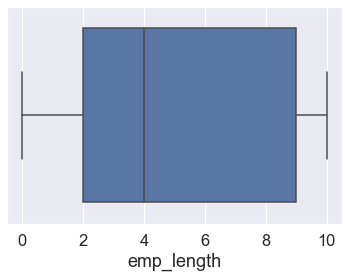

In [121]:
#Checking if there are any outliers using boxplot

import seaborn as sns
sns.boxplot(df.emp_length)

**We can consider mean as the representative value of emp_length as there are no outliers.**


In [122]:
# Preserving the mean value of emp_length excluding the NA entries

mean_emp_length = np.mean(df[df.emp_length > 0]['emp_length'])

In [123]:
# Imputing the NA values with the mean of the emp_length

df.emp_length = df.emp_length.apply(lambda x : int(mean_emp_length) if x==0 else int(x))
df.emp_length.value_counts()

10    8879
1     7823
2     4388
5     4357
3     4095
4     3436
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [124]:
# checking for missing values percentage
round(df.isnull().sum()/len(df.index)*100,2)

id                     0.0
member_id              0.0
loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
zip_code               0.0
addr_state             0.0
dti                    0.0
policy_code            0.0
application_type       0.0
dtype: float64

In [125]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,1,INDIVIDUAL


In [126]:
# Checking the data types of all columns
df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
policy_code              int64
application_type        object
dtype: object

* The columns **int_rate** and **term** are of type **Object**. 
* Converting these columns into float and int respectively for the data analysis. 

In [127]:
# Removing 'months' from the text in  the column - 'term' and converting to int.

df.term = df.term.apply(lambda x : int((x).split(' ')[1]))
print(df.term.dtype)
df.term.value_counts()

int64


36    29096
60    10621
Name: term, dtype: int64

In [128]:
# Removing '%' from 'int_rate' and converting to float

df.int_rate = df.int_rate.apply(lambda x : float(x[:-1]))
print(df.int_rate.dtype)
df.head()

float64


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,1,INDIVIDUAL


In [129]:
# Checking the possible values of loan_status in the dataset

df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Ignoring rows where the loan_status is 'Current'

**1. Now that we have treated missing values in the dataset, we can ignore the data which is not relevant for our analysis.** 

**2. Since the loan_status - 'Current' doesn't provide any insights on whether the borrower will repay or default the loan, we can ignore all such entries.**

In [130]:
# Removing the rows where loan_status is marked as 'Current'

loans = df[df.loan_status!='Current']
loans.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [131]:
# Check the shape of the loans dataset after data cleaning

loans.shape

(38577, 22)

#  <u><font style="color:#002244">3. DATA ANALYSIS</font>

In [132]:
# Columns available for our analysis 

loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'policy_code', 'application_type'],
      dtype='object')

In [133]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,1,INDIVIDUAL


#### Checking the percentage of the defaulters

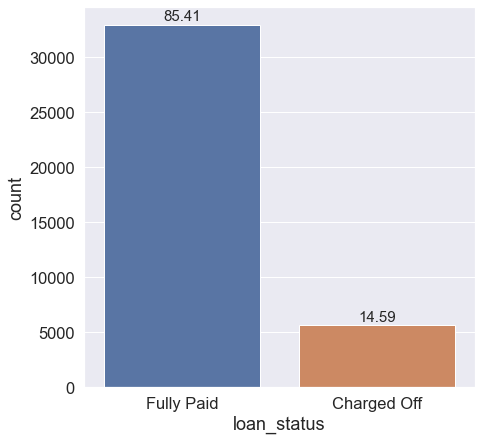

In [134]:
plt.figure(figsize=(7,7))
plot = sns.countplot(data=loans, x='loan_status') 
sns.set(font_scale=2)
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()/len(loans.index)*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points')

#### *We can see that around **14.6%** of the borrowers have defaulted.*

## <font style="color:#800020">a. Univariate Analysis</font>

### Variable : 'funded_amnt_inv'

In [135]:
# describing the 'funded_amnt_inv'
loans.funded_amnt_inv.describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

* Max Funded Amount = 35000
* Average Funded Amount = 10222

In [136]:
# describing the 'funded_amnt_inv' for those who have repaid the loan successfully 
loans[loans.loan_status=='Fully Paid']['funded_amnt_inv'].describe()

count    32950.000000
mean     10112.837414
std       6901.840874
min          0.000000
25%       5000.000000
50%       8500.000000
75%      13950.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

* Max Funded Amount = 35000
* Average Funded Amount = 10112

In [137]:
# describing the 'funded_amnt_inv' for those who have failed to repay the loan
loans[loans.loan_status=='Charged Off']['funded_amnt_inv'].describe()

count     5627.000000
mean     10864.521324
std       7661.750540
min          0.000000
25%       5000.000000
50%       9401.209477
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

* Max Funded Amount = 35000
* Average Funded Amount = 10864

**We can see that there's no significant difference in the amount of loan sanctioned when compared among those who successfully repaid the loan and those who have defaulted**

# <u><font style="color:#002244"> DERIVING TYPE DRIVEN METRICS FOR POSSIBLE NUMERIC COLUMNS </font> <br>
   
* **Since most of our columns are numeric, we can categorize each of those columns into meaningful intervals.**
* **This will make our visualization easily interpretable.**
    

#### Let's now understand the 'funded_amnt_inv' trend among the defaulters

* Since Defaulted is a **categorical non-numeric** variable, converting it into numeric will enable us to do quantiative analysis. Also, the **funded_amnt_inv** contains amounts accross ranging from 0-35k. Let's also categorize it into categories of 5k invertals for better visual understanding of the trend.


* **Let's create 2 columns:** 
    1. **Defaulted** : Contains 1 if Defaulted and 0 if Fully Paid. This will be useful to find the default rate.
    2. **amount_range** : Categorizing the 'funded_amnt_inv' into 6 buckets with an interval of 5k.

In [138]:
# creating the defaulted column
loans['defaulted'] = loans.loan_status.apply(lambda x : 0 if str(x)=='Fully Paid' else 1)
loans['defaulted'].value_counts()

0    32950
1     5627
Name: defaulted, dtype: int64

In [139]:
# utility function to catgorize the 'funded_amnt_inv' into various categories

def form_amount_groups(a):
    if(a<=5000):
        return '0 - 5k'
    elif(a>5000 and a<=10000):
        return '5k - 10k'
    elif(a>10000 and a<=15000):
        return '10k - 15k'
    elif(a>15000 and a<=20000):
        return '15k - 20k'
    elif(a>20000 and a<=25000):
        return '20k - 25k'
    else:
        return '25k and above'
    

In [140]:
# creating the 'amount_range' column using the above defined function
loans['amount_range'] = loans['funded_amnt_inv'].apply(form_amount_groups)
loans['amount_range'].value_counts()

5k - 10k         12757
0 - 5k           10701
10k - 15k         7617
15k - 20k         3984
20k - 25k         2316
25k and above     1202
Name: amount_range, dtype: int64

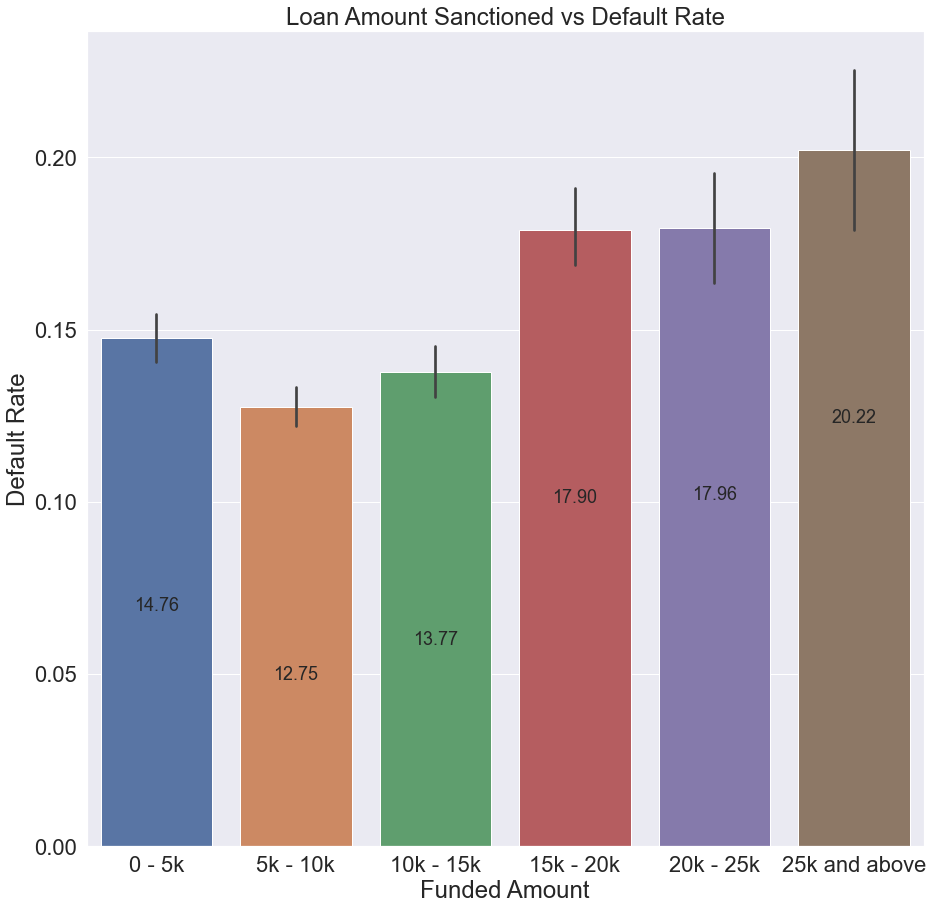

In [141]:
#visualizing the defaulters trend based on the funded_amnt_inv

#setting the size
plt.figure(figsize=(15,15)) 

#creating a barplot
plot = sns.barplot(data=loans, x='amount_range', y='defaulted') 

# set the title of the plot
plot.set_title('Loan Amount Sanctioned vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Funded Amount')

#annotating the bars with default rate %
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')


### Obesrvations :

1. Among the defaulters, those with a loan amount greater than 15k are more likely to default than those with lesser loan amount.


2. The highest defualt rate **(20.22%)** is among those who have taken a loan of **greater than 25k.**

### Variable : 'int_rate'

* Let's now understand whether the 'int_rate' has any impact on the defaulters

In [142]:
# Understand the statistics of the column 'int_rate'

# Observe the values for median, mean, and other quantiles. 

loans.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

* Let's also categorize **int_rate** into categories as shown below. The categories have been randomly created to see if there's a change in defualt rate as the interest rates get higher which is not possible to visualize with numeric data of 30K plus records.

In [143]:
#Utility function to categorize the entries based on interest rates. 

# Based on the stats from the describe() function, created 4 categories.

def form_int_groups(interest):
    if interest>=5 and interest<=9:
        return '05% - 09%'
    elif interest>9 and interest<=12:
        return '09% - 12%'
    elif interest>12 and interest<=15:
        return '12% - 15%'
    else:
        return '> 15%'

In [144]:
# Create a new column -> int_rate_groups by applying the above defined function.

loans['int_rate_groups'] = loans.int_rate.apply(form_int_groups)
loans.int_rate_groups.value_counts()

09% - 12%    10853
12% - 15%     9920
05% - 09%     9808
> 15%         7996
Name: int_rate_groups, dtype: int64

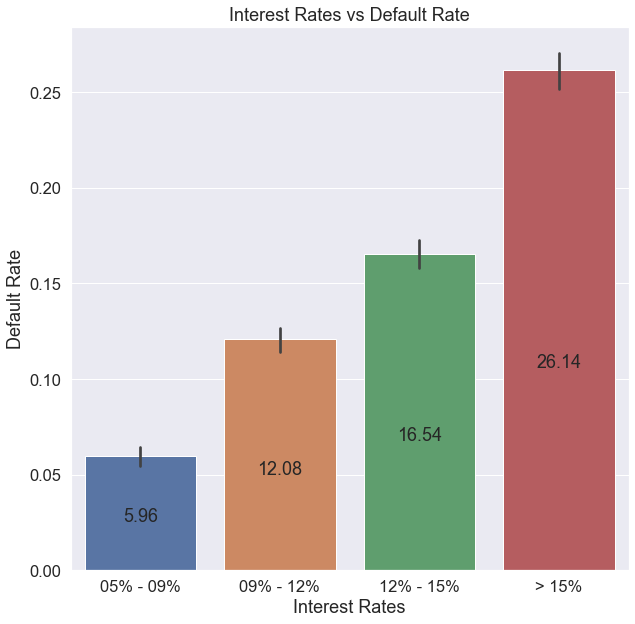

In [145]:
# #visualizing the defaulters trend based on the int_rate

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

# creating a barplot
plot = sns.barplot(data=loans, x='int_rate_groups', y='defaulted', order=sorted(loans.int_rate_groups.unique()))

# set the title of the plot
plot.set_title('Interest Rates vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Interest Rates')

#annotating the bars with default rate %
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()/2.5), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')


### Variable : 'term'

* Let's now understand whether the term has any impact on the defaulters

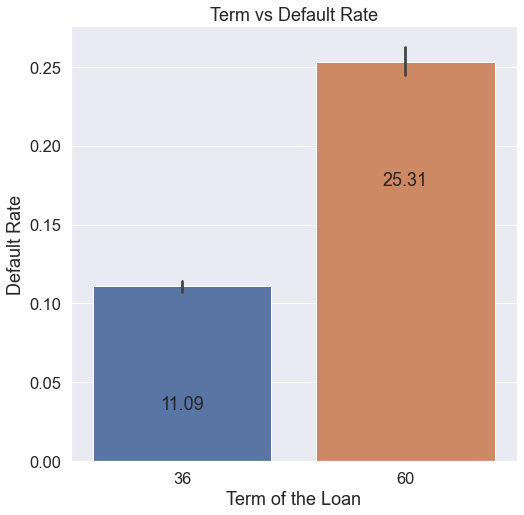

In [146]:
#visualizing the defaulters trend based on the term

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(8,8))

##creating a barplot
plot = sns.barplot(data=loans, x='term', y='defaulted')

# set the title of the plot
plot.set_title('Term vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Term of the Loan')


#annotating the bars with default rate %
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')


### Obesrvations : 

* The borrowers opting for **60-month** term are more likely to **default**.
* We can see **25%** of the borrowers opting for **60-month** term have defaulted whereas only **11%** of the borrowers have defualted who have opted for **36-month** term.

### Variable : 'Purpose'

* Let's now understand whether the 'Purpose' has any impact on the defaulters

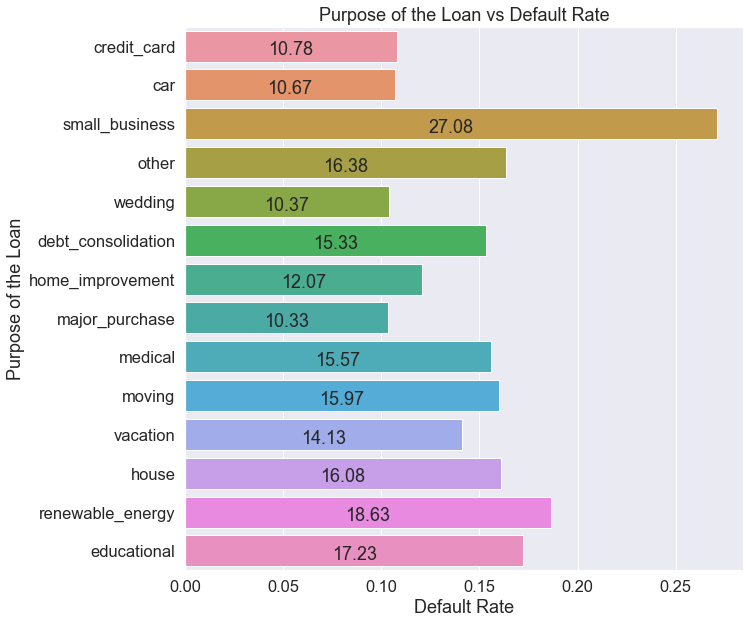

In [147]:
# visualizing the defaulters trend based on the purpose

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#creating a barplot
plot=sns.barplot(data=loans, x='defaulted', y='purpose', ci=None)

# set the title of the plot
plot.set_title('Purpose of the Loan vs Default Rate')

#set x-axis and y axis labels
plot.set(xlabel='Default Rate', ylabel='Purpose of the Loan')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_width()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_y()+0.7), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')



### Obesrvations : 

* The borrowers stating the **Purpose** as **small business** are more likely to default followed by **renewable energy** and **educational**.


### Variable : 'home_ownership'

* Let's now understand whether the 'home_ownership' has any impact on the defaulters

In [148]:
loans.groupby(['home_ownership'])['defaulted'].mean()

home_ownership
MORTGAGE    0.136713
NONE        0.000000
OTHER       0.183673
OWN         0.148908
RENT        0.153626
Name: defaulted, dtype: float64

### Obesrvations : 

* The borrowers' tendency to either default or repay successfully has not got much impact from the **home_ownership** as default rate for all the categories **remain almost same**. 
* The borrowers with home_ownership category as **'NONE' have not defaulted**. However, since there are only **3 entries with the NONE category**, we do not have any conclusive evidence to draw insights.
* Overall, the variable **'home_ownership'** has **barely got any influence** on whether the borrower defaults the loan and hence it's **not a strong predictor** for us.



### Variable : 'annual_inc'

* Let's now understand whether the 'annual_inc' has any impact on the defaulters

In [149]:
#Using describe function on annual_inc column to understand the stats.

loans.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

* Let's also categorize **annual_inc** into categories as shown below. The categories have been randomly created to see if there's a change in defualt rate as the annual_income varies, which is not possible to visualize with numeric data of 30K plus records.

In [150]:
# Utility function to form categorize people based on their annual income.

def form_inc_groups(a):
    if a<=50000:
        return '0 - 50k'
    if a>50000 and a<=100000:
        return '50k - 1L'
    elif a>100000 and a<=200000:
        return '1L - 2L'
    elif a>200000 and a<=500000:
        return '2L - 5L'
    elif a>500000 and a<=1500000:
        return '5L - 15L'
    elif a>1500000 and a<=3000000:
        return '15L - 30L'
    else:
        return 'More than 30L'

In [151]:
# Create a new column 'salary_group' by applying the above defined function

loans['salary_group'] = loans.annual_inc.apply(form_inc_groups)
loans['salary_group'].value_counts()

50k - 1L         17707
0 - 50k          15389
1L - 2L           4911
2L - 5L            504
5L - 15L            61
15L - 30L            3
More than 30L        2
Name: salary_group, dtype: int64

### Observations :
* We can observe that the number of people with annual income greater than 5 lakhs is 67. 
* So, we can club the last 3 groups to a single group -> **Salary greater than 5L**

In [152]:
#clubbing the last 3 groups 5L-15L, 15L-30L and >30L into one group -> more than 5L

loans.salary_group = loans.salary_group.apply(lambda x : 'Greater than 5L' 
                                        if (x=='5L - 15L' or x=='15L - 30L' or x=='More than 30L') else x )
loans.salary_group.value_counts()

50k - 1L           17707
0 - 50k            15389
1L - 2L             4911
2L - 5L              504
Greater than 5L       66
Name: salary_group, dtype: int64

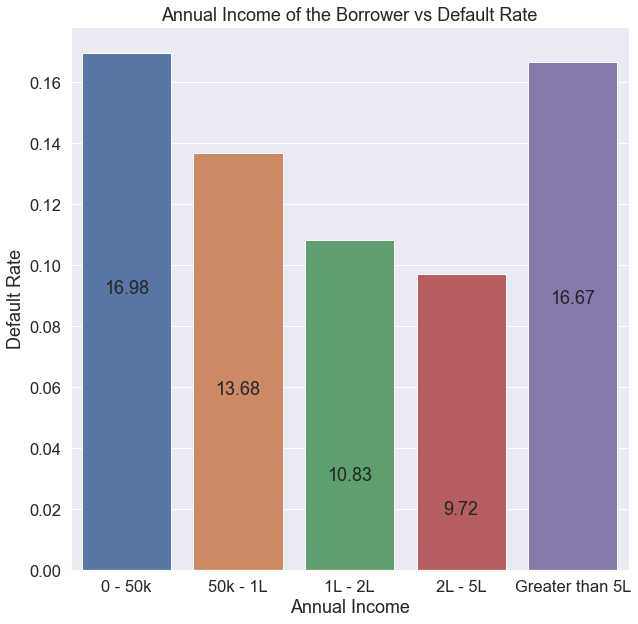

In [153]:
# visualizing the defaulters trend based on the 'annual_inc'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#creating a barplot
plot=sns.barplot(data=loans, x='salary_group', y='defaulted', ci=None)

# set the title of the plot
plot.set_title('Annual Income of the Borrower vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Annual Income')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')


### Observations :

* We can observe from the above plot that the people whose annual income is **less than 50,000/-** and **more than 5 lakhs/-** are more likely to default.
* There's a good chance that people with income **greater than 50,000/- and less than 1 lakh** may also default. 

### Variable : 'verification_status'

* Let's now understand whether the 'verification_status' has any impact on the defaulters

In [154]:
loans.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [155]:
loans.groupby(['verification_status'])['defaulted'].mean()

verification_status
Not Verified       0.128310
Source Verified    0.148186
Verified           0.168032
Name: defaulted, dtype: float64

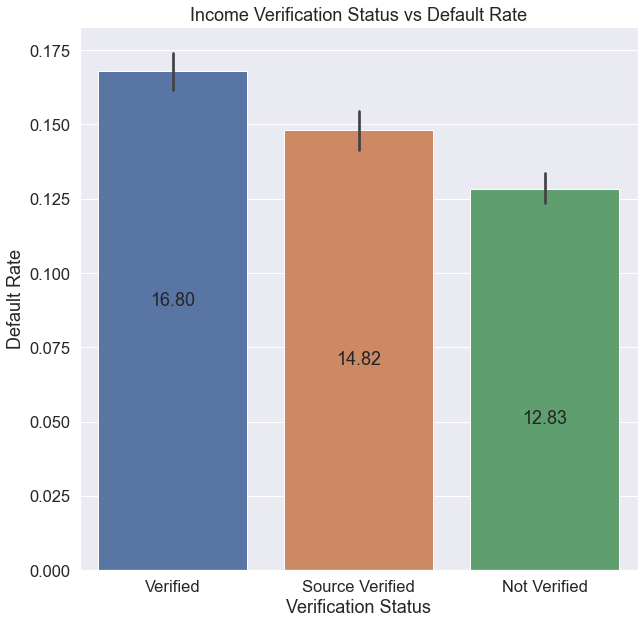

In [156]:
# visualizing the defaulters trend based on the 'annual_inc'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#creating a barplot
plot=sns.barplot(data=loans, x='verification_status', y='defaulted')

# set the title of the plot
plot.set_title('Income Verification Status vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Verification Status')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')

### Observations : 

* The borrowers' tendency to either default or repay successfully has not got much impact from the **verification_status** as default rate for all the categories **remain almost same**. 
* Hence the column **verification_status** is **not a strong predictor** for our analysis.

### Variable : 'emp_length'

* Let's now understand whether the 'emp_length' has any impact on the defaulters

In [157]:
# Checking the value_counts of emp_length

loans.emp_length.value_counts()

10    8488
1     7677
2     4291
5     4227
3     4012
4     3342
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

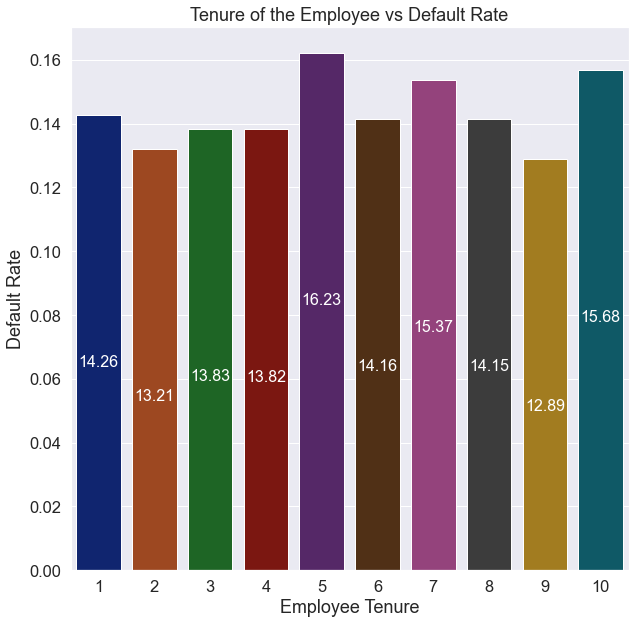

In [158]:
# visualizing the defaulters trend based on the 'emp_length'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#creating a barplot
plot=sns.barplot(data=loans, x='emp_length', y='defaulted', palette="dark", ci=None)

# set the title of the plot
plot.set_title('Tenure of the Employee vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Employee Tenure')

#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=16, xytext=(0, 8), 
                   textcoords='offset points', color='white')

**Since the default rate doesn't vary much across different employee tenures, let's bin them into broader intervals**

In [159]:
# checking the default rate of the people who have emp_length between 1 and 3 years

loans[(loans.emp_length>=1) & (loans.emp_length<=3)]['defaulted'].mean()

0.13873591989987485

In [160]:
# checking the default rate of the people who have emp_length between 4 and 7 years

loans[(loans.emp_length>3) & (loans.emp_length<=7)]['defaulted'].mean()

0.15006988120195666

In [161]:
# checking the default rate of the people who have emp_length more than 7 years
loans[(loans.emp_length>7)]['defaulted'].mean()

0.1517624899094089

### Observations : 

* The borrowers' tendency to either default or repay successfully has not got much impact from the **emp_length** as default rate for all the categories **remain almost same**. 
* Hence the column **emp_length** is **not a strong predictor** for our analysis.

### Variable : 'dti'

* Let's now understand whether the 'dti' has any impact on the defaulters

In [162]:
# Checking the statistics of dti column using describe()

loans.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

Let's also categorize **dti** into categories as shown below. The categories have been randomly created to see if there's a change in defualt rate as the **debt to income** varies, which is not possible to visualize with numeric data of 30K plus records.

In [163]:
# Utility function to group the data based on dti

def form_dti_groups(dti):
    if dti<=5:
        return '0-5%'
    elif dti>5 and dti<=10:
        return '05-10%'
    elif dti>10 and dti<=15:
        return '10-15%'
    elif dti>15 and dti<=20:
        return '15-20%'
    elif dti>20 and dti<=25:
        return '20-25%'
    else:
        return '>25%'

In [164]:
loans['dti_group'] = loans.dti.apply(form_dti_groups)
loans.dti_group.value_counts()

10-15%    9630
15-20%    8811
05-10%    7873
20-25%    6578
0-5%      5062
>25%       623
Name: dti_group, dtype: int64

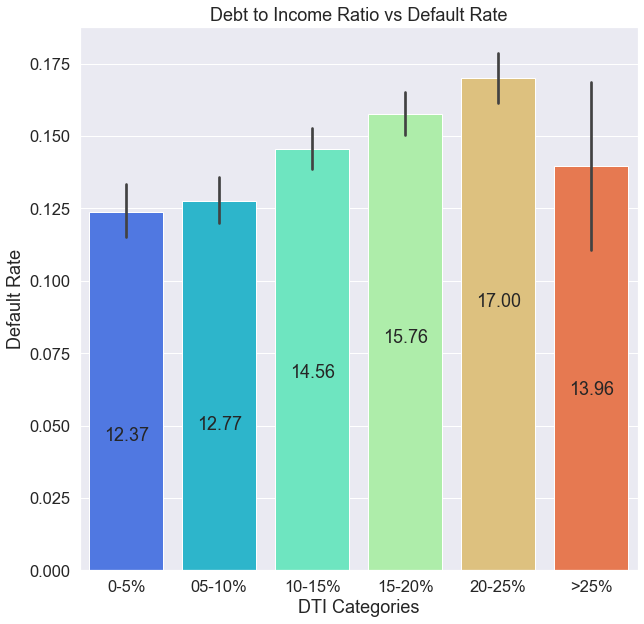

In [165]:
# visualizing the defaulters trend based on the 'dti'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#creating a barplot
plot=sns.barplot(data=loans, x='dti_group', y='defaulted', order=sorted(loans.dti_group.unique()), 
                palette='rainbow')

# set the title of the plot
plot.set_title('Debt to Income Ratio vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='DTI Categories')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')

### Observations : 

* The borrowers' tendency to either default or repay successfully has not got much impact from the **dti** as default rate for all the categories **remain almost same**. 
* Hence the column **dti** is **not a strong predictor** for our analysis.

### Variable : 'issue_d'

* Let's now understand whether the 'dti' has any impact on the defaulters

In [166]:
# Checking the value_counts() of issue_d column 
loans.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [167]:
# Create a new column from issue_d -> Month 

loans['issued_month'] = loans.issue_d.apply(lambda x : str(x).split('-')[0])
loans.issued_month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issued_month, dtype: int64

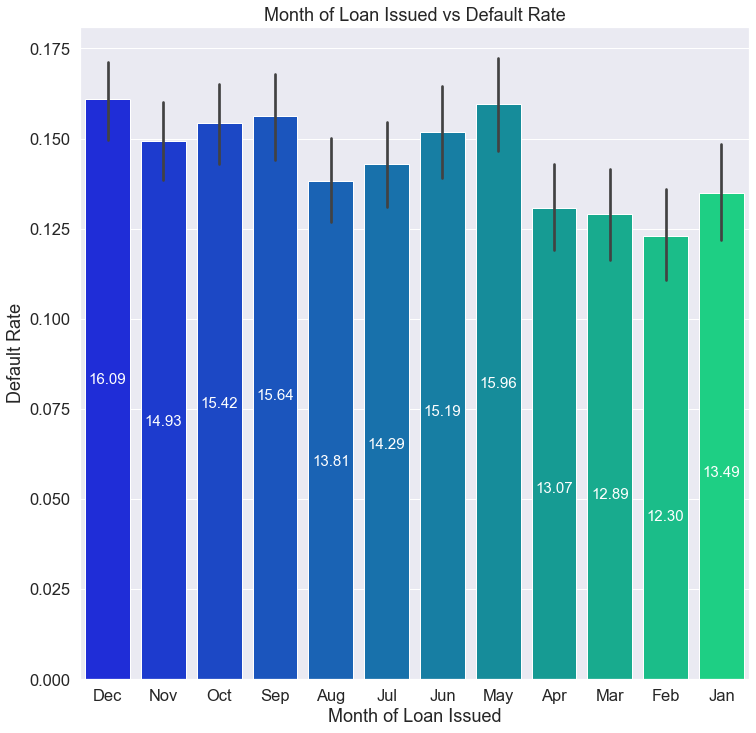

In [168]:
# visualizing the defaulters trend based on the 'issued_month'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(12,12))

#creating a barplot
plot=sns.barplot(data=loans, x='issued_month', y='defaulted', palette='winter')

# set the title of the plot
plot.set_title('Month of Loan Issued vs Default Rate')

#set x-axis and y axis labels
plot.set(ylabel='Default Rate', xlabel='Month of Loan Issued')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points', color='white')

### Observations : 

* The borrowers' tendency to either default or repay successfully has not got much impact from the **month** as default rate for all the categories **remain almost same**. 
* Hence the column **month** is **not a strong predictor** for our analysis.

### Variables : 'Grade and Sub-Grade'

* Let's now understand how 'grade' and 'sub_grade' vary with defaulted rate.

In [169]:
# Checking the statistics of grade column using value_counts()

loans.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

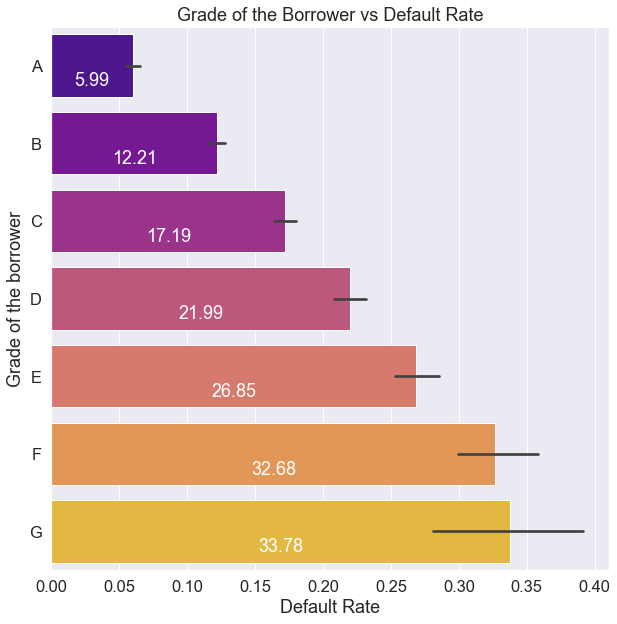

In [170]:
# visualizing the defaulters trend based on the 'grade'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#creating a barplot
plot=sns.barplot(data=loans, x='defaulted', y='grade', order=sorted(loans.grade.unique()), palette = 'plasma')

# set the title of the plot
plot.set_title('Grade of the Borrower vs Default Rate')

#set x-axis and y axis labels
plot.set(xlabel='Default Rate', ylabel='Grade of the borrower')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_width()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_y()+0.7), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points', color='white')

In [171]:
loans.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

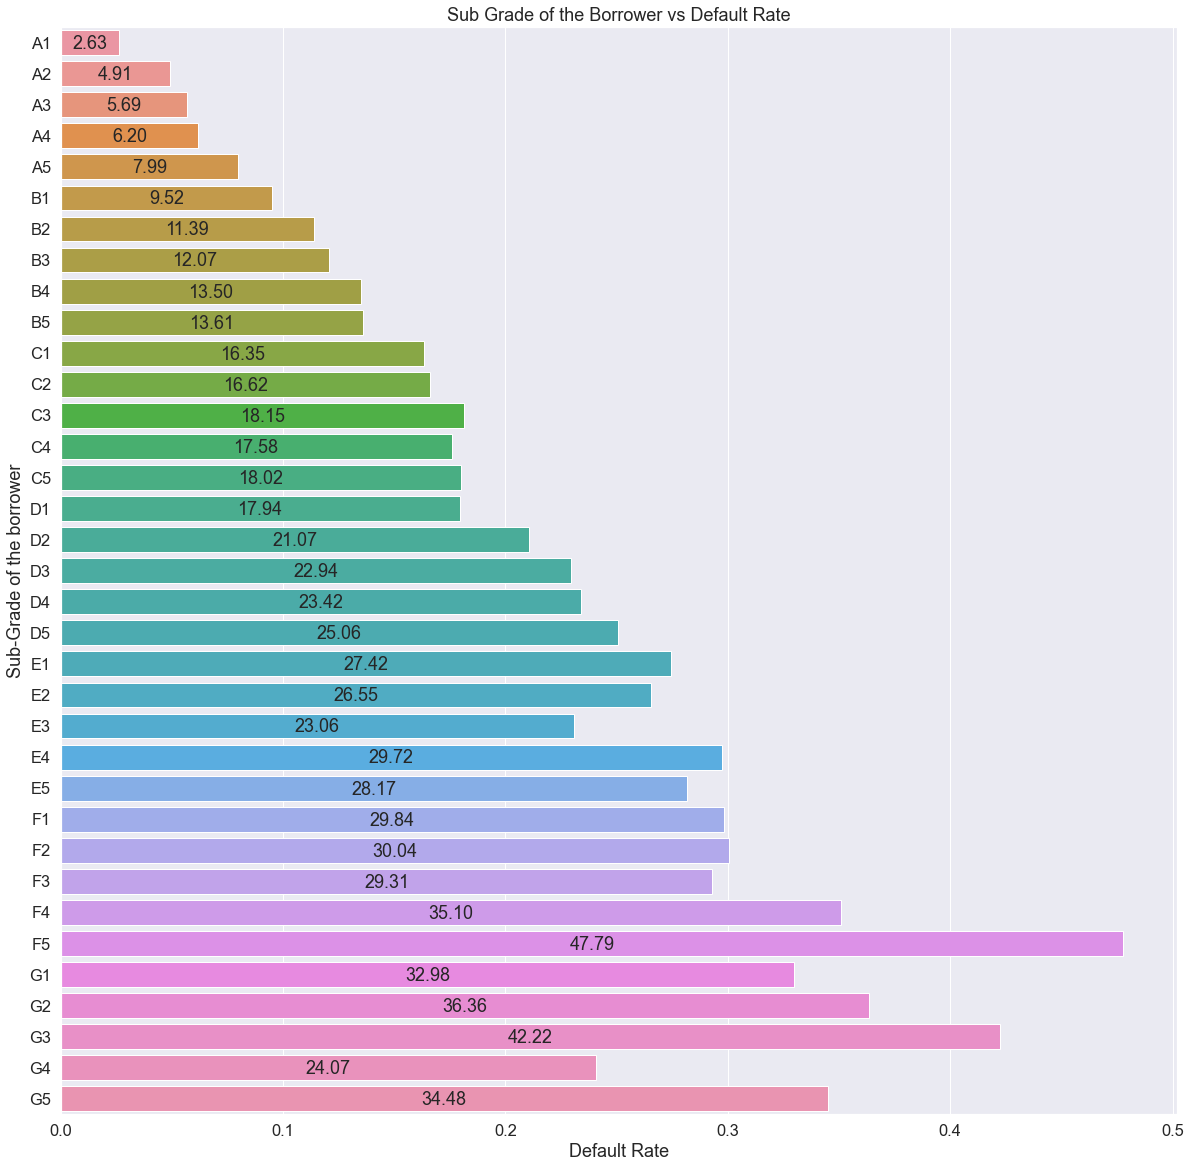

In [172]:
# visualizing the defaulters trend based on the 'sub_grade'

#setting the font size
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(20,20))

#creating a barplot
plot=sns.barplot(data=loans, x='defaulted', y='sub_grade', order=sorted(loans.sub_grade.unique()), ci=None)

# set the title of the plot
plot.set_title('Sub Grade of the Borrower vs Default Rate')

#set x-axis and y axis labels
plot.set(xlabel='Default Rate', ylabel='Sub-Grade of the borrower')


#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_width()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_y()+0.7), ha='center', va='center', 
                   size=18, xytext=(0, 8), 
                   textcoords='offset points')

### Observations : 

* On analysing the **grade** column, **grade-F and grade-G** borrowers are more likely to default the loan.
* However, the sub_grade analysis shows that borrowers with **grade-F5** have the highest defaulters with a default rate of **47.47**. ( highest default rate among all other variables )

## OBSERVATIONS FROM UNIVARIATE ANALYSIS : 

* **For any column to be a strong predictor to decide whether or not a loan can be sanctioned, the data in the column needs to have a significant range.**
* **Let's now find such columns from those that we have analysed in univariate analysis.**

In [173]:
# Utility function to determine the range of the default rate for each column of interest

def default_rates(data_f, columns):
    univ_analysis = {}
    for i in columns:
        df1 = pd.DataFrame(data_f.groupby(i)['defaulted'].mean()*100)
        max = df1.defaulted.max()
        if df1.defaulted.min() == 0:
            min = list(df1.defaulted.nsmallest(2))[1]
        else:
            min = df1.defaulted.min()
        diff = max-min
        univ_analysis[i] = list([max, min, diff])
    return univ_analysis

In [174]:
# create a dataframe with the columns on which we have done univariate analysis
# Conclude using the max default rate and min default rate

univ_analysis = default_rates(loans, ['amount_range','term','int_rate_groups', 'purpose', 
                                      'home_ownership','salary_group','emp_length','dti_group', 'issued_month','verification_status','grade','sub_grade'])
univ_analysis_df = pd.DataFrame(univ_analysis)
univ_analysis_df = pd.DataFrame.transpose(univ_analysis_df)


In [175]:
# Rename the columns to some meaningful terms
univ_analysis_df = univ_analysis_df.rename(columns= {0: 'Max Default Rate', 1: 'Min Default Rate', 2: 'Difference' })
univ_analysis_df

,Max Default Rate,Min Default Rate,Difference
amount_range,20.216306,12.745943,7.470363
term,25.313785,11.090872,14.222914
int_rate_groups,26.138069,5.964519,20.173550
purpose,27.080958,10.325581,16.755376
home_ownership,18.367347,13.671347,4.696000
salary_group,16.979661,9.722222,7.257439
emp_length,16.229004,12.887439,3.341565
dti_group,16.996047,12.366653,4.629394
issued_month,16.085409,12.298558,3.786851
verification_status,16.803212,12.830957,3.972254


In [176]:
univ_analysis_df = univ_analysis_df.sort_values(by='Difference', ascending=False)
univ_analysis_df

,Max Default Rate,Min Default Rate,Difference
sub_grade,47.787611,2.633889,45.153721
grade,33.779264,5.993031,27.786233
int_rate_groups,26.138069,5.964519,20.173550
purpose,27.080958,10.325581,16.755376
term,25.313785,11.090872,14.222914
amount_range,20.216306,12.745943,7.470363
salary_group,16.979661,9.722222,7.257439
home_ownership,18.367347,13.671347,4.696000
dti_group,16.996047,12.366653,4.629394
verification_status,16.803212,12.830957,3.972254


### <font color='green'>Observations :</font>

* **`The top 5 strong predictors from our univariate analysis are as follows:`**

    **`1.  sug_grade       - Sub Grade`**
     
    **`2.  grade           - Grade`**

    **`3.  int_rate        - Interest Rate`**
    
    **`4.  purpose         - Purpose of Loan`**
    
    **`5.  term            - Term of the Loan`**
     
    

## <font style="color:#800020">b. BIVARIATE ANALYSIS</font>

### Variables : 'funded_amt_inv - term'

* Let's see how term and funded_amt_inv behave together against defaulted rates

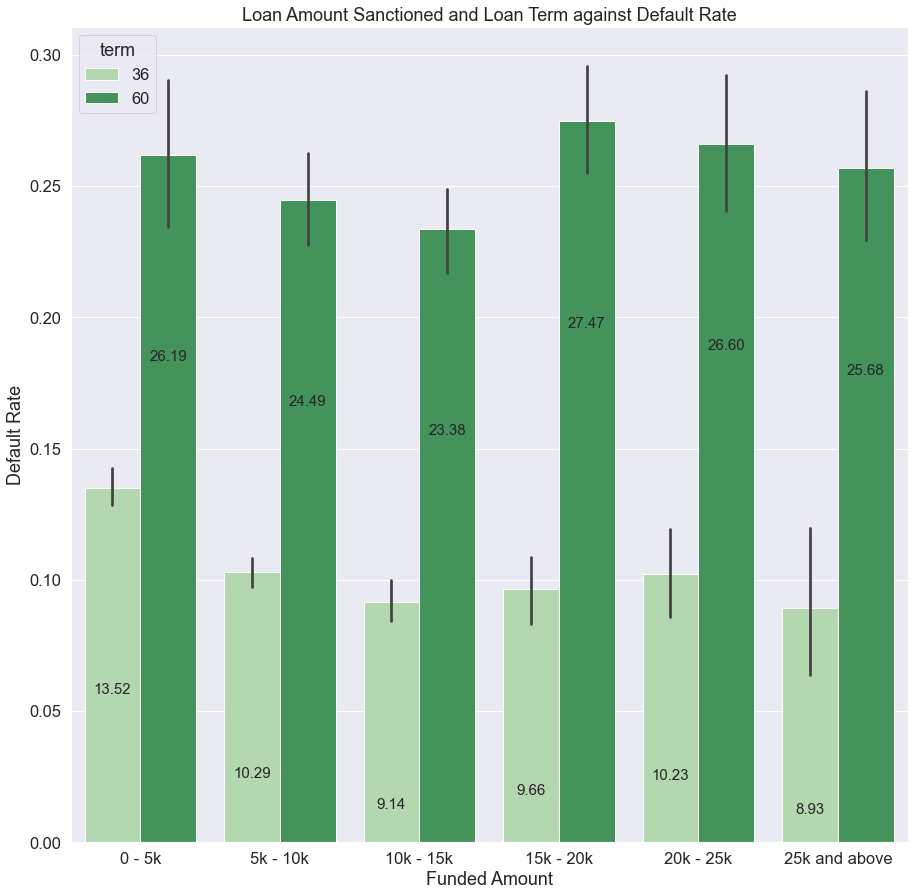

In [177]:
# Create a grouped bar chart with funded_amnt_inv and term on X-axis, default rate on Y-axis 
# Each bar in the bar group represents the term. 

# setting the font scale
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(15,15))

plot=sns.barplot(
    data=loans,
    x='amount_range', y="defaulted", hue="term",
    palette="Greens", 
)

plot.set_title('Loan Amount Sanctioned and Loan Term against Default Rate')

plot.set(ylabel='Default Rate', xlabel='Funded Amount')

# Annotate the bars with the default rate percentage
for bar in plot.patches: 
    plot.annotate(format(bar.get_height()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()-0.08), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points')

### Observations: 

* From the above grouped bar chart, we can infer that borrowers who have opted for **60-month term** have **high chances to default** across **all categories of funded_amnt_inv.** 

### Variables : 'funded_amt_inv - int_rate'

* Let's see how int_rate and funded_amt_inv behave together against defaulted rates

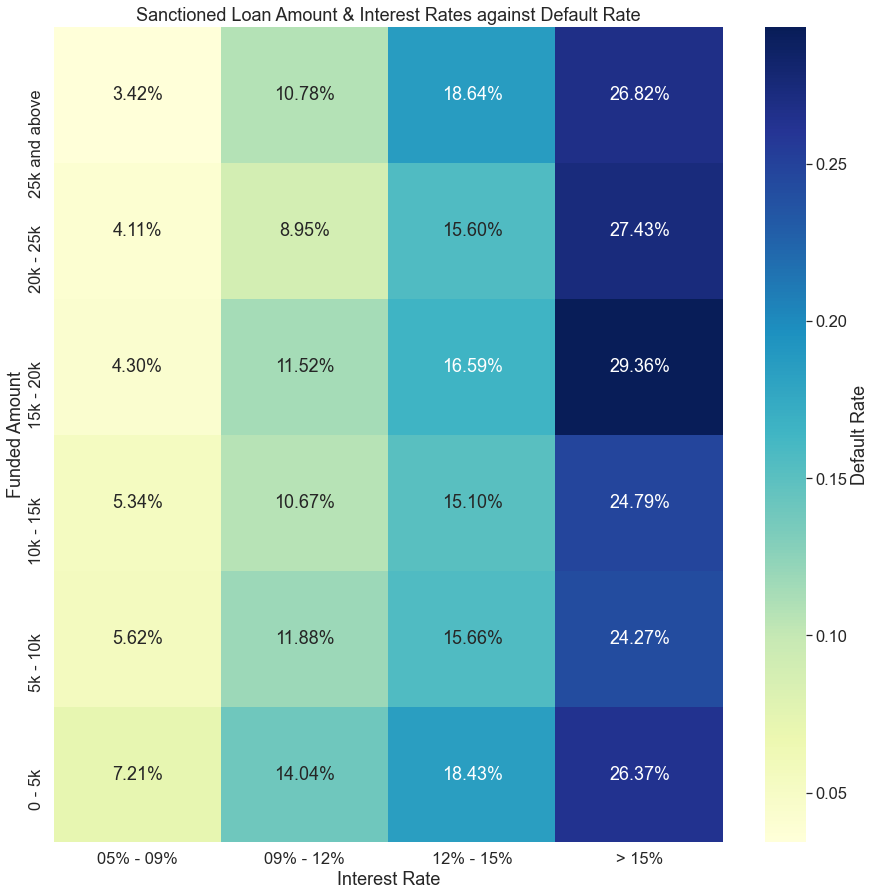

In [178]:
# Create a heatmap bar with  funded_amnt_inv on Y-axis and int_rate on X-axis
# colours in the heatmap represent the default rate. 

#Setting the font scale
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(15,15))

#Create a pivot table for using it in the heatmap
fund_amnt_int_rate = loans.pivot_table(index='amount_range',columns='int_rate_groups',values='defaulted',aggfunc="mean")

fund_amnt_int_rate_order = ["0 - 5k", "5k - 10k", "10k - 15k", "15k - 20k", "20k - 25k" , "25k and above"]

fund_amnt_int_rate = fund_amnt_int_rate.reindex(fund_amnt_int_rate_order)

# Plot the heatmap
plot = sns.heatmap(fund_amnt_int_rate, annot=True, fmt='.2%' ,cbar_kws={'label': 'Default Rate'}, cmap="YlGnBu")

#set the title
plot.set_title("Sanctioned Loan Amount & Interest Rates against Default Rate")

#set the x and y axes labels
plot.set(xlabel='Interest Rate', ylabel='Funded Amount')

plot.invert_yaxis()

plt.show()

### Observations: 

* For any given value of funded_amnt_inv, as the interest rate increases, the default rate also increases. This might be due to the inability of the borrower to manage his/her EMIs as the interest grows. 
* Interestingly, the percentage of defaulters is slightly higher across all the interest rates from 5-15% where the funded_amnt_inv is 0-5k. This can be considered as an indicator to assume that borrowers seeking for less loan usually tend to default more. 
* However when the interest rate is greater than 15%, the default rate is nearly uniform irrespective of the funded amount. 

### Variables : 'funded_amt_inv - annual_inc'

* Let's see how annual_inc and funded_amt_inv behave together against defaulted rates

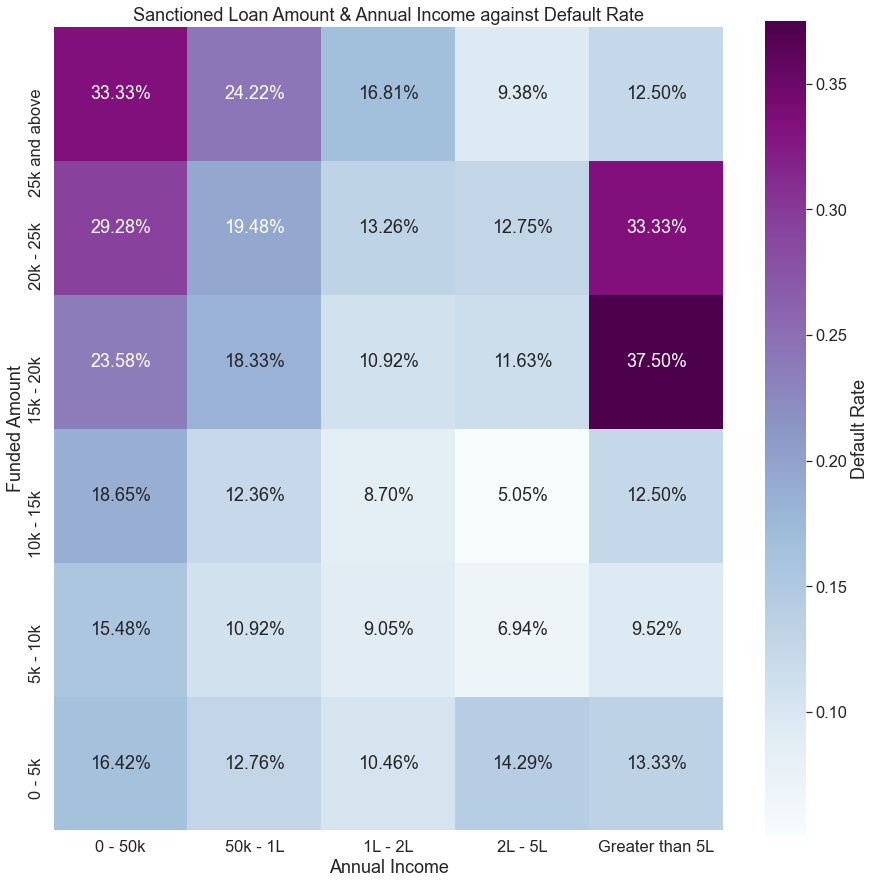

In [179]:
# Create a heatmap bar with  funded_amnt_inv on Y-axis and annual_inc on X-axis
# colours in the heatmap represent the default rate. 

#Setting the font scale
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(15,15))

#Create a pivot table for using it in the heatmap
fund_amnt_ann_inc = loans.pivot_table(index='amount_range',columns='salary_group',values='defaulted',aggfunc="mean")

fund_amnt_ann_inc_order = ["0 - 5k", "5k - 10k", "10k - 15k", "15k - 20k", "20k - 25k" , "25k and above"]

ann_inc_order = ["0 - 50k", "50k - 1L", "1L - 2L", "2L - 5L", "Greater than 5L"]

fund_amnt_ann_inc = fund_amnt_ann_inc.reindex(index=fund_amnt_ann_inc_order,columns=ann_inc_order)


# Plot the heatmap
plot = sns.heatmap(fund_amnt_ann_inc, annot=True, fmt='.2%' ,cbar_kws={'label': 'Default Rate'}, cmap="BuPu",square=True)

#set the title
plot.set_title("Sanctioned Loan Amount & Annual Income against Default Rate")

#set the x and y axes labels
plot.set(xlabel='Annual Income', ylabel='Funded Amount')

#invert the Y axis
plot.invert_yaxis()

plt.show()

### Observations: 

* Although the default rate across **Annual Income** alone did not vary much as we could see in the **Univariate Analysis**, when we add in the **Loan Amount** as 2nd parameter into our analysis, we can see a significant trend for higher loan amounts.

* For loan amounts greater than 15k, the **default rate** decreases as the **Annual Income** gets better.

* However, irrespective of the **Loan Amount**, the **Default Rate** is fairly higher for those who have claimed an **Annual Income** greater than **5 Lakh**. 

### Variables : 'term - annual_inc'

* Let's see how term and annual_inc behave together against defaulted rates

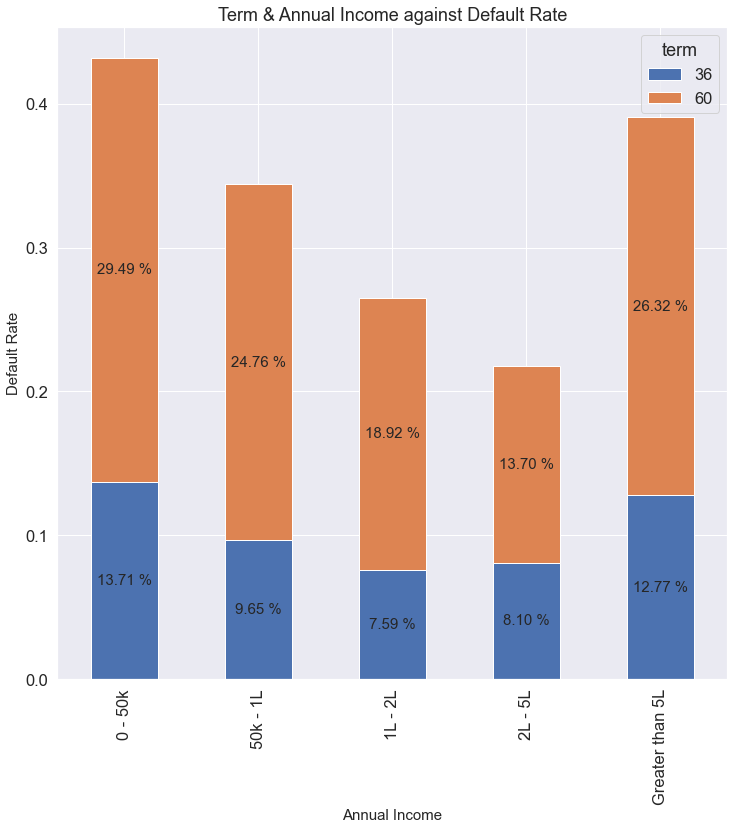

In [180]:

# Create a stacked bar chart for term, annual_income against defaulted rates 
# Each colour in the stacked bar represents the term. 

# create a pivot table 

term_ann_inc = loans.pivot_table(index='salary_group',columns='term',values='defaulted',aggfunc="mean")

term_ann_inc_order = ["0 - 50k", "50k - 1L", "1L - 2L", "2L - 5L", "Greater than 5L"]


# plot the stacked bar chart
plot = term_ann_inc.loc[term_ann_inc_order].plot(kind='bar', stacked = True, figsize=(12,12))

# set X and Y axes labels
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)

# set the plot title
plt.title('Term & Annual Income against Default Rate')

# annotate the bars
for p in plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plot.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', size=15 ,
            verticalalignment='center')

plt.show()

### Observations : 

* The **defaulted percentage** across all the **salary ranges** is higher if the **Loan-Term is 60 months**.


### Variables : 'annual_inc - int_rate'

* Let's see how annual_inc and int_rate behave together against defaulted rates

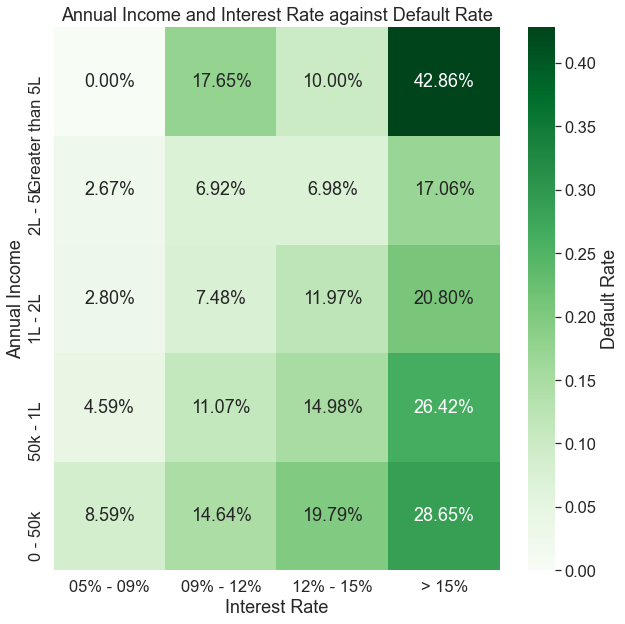

In [181]:
# Create a heatmap bar with  annual_inc on Y-axis and int_rate on X-axis
# colours in the heatmap represent the default rate. 

#Setting the font scale
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(10,10))

#Create a pivot table for using it in the heatmap
ann_inc_int_rate = loans.pivot_table(index='salary_group',columns='int_rate_groups',values='defaulted',aggfunc="mean")

ann_inc_int_rate_order = ["0 - 50k", "50k - 1L", "1L - 2L", "2L - 5L", "Greater than 5L"]

ann_inc_int_rate = ann_inc_int_rate.reindex(ann_inc_int_rate_order)

# Plot the heatmap
plot = sns.heatmap(ann_inc_int_rate, annot=True, fmt='.2%' ,cbar_kws={'label': 'Default Rate'}, cmap="Greens")

#set the title
plot.set_title("Annual Income and Interest Rate against Default Rate")

#set the x and y axes labels
plot.set(xlabel='Interest Rate', ylabel='Annual Income')

#invert the Y axis
plot.invert_yaxis()

plt.show()

### Observations :

* Irrespective of the **Annual Income** if the **Interest Rate** is greater than **15%** the borrowers are more likely to **Default**.

* Lesser the **Interest Rate** and higher the **Annual Income**, Lesser is the **Default Rate**

### Variables  grade - annual_inc

* Let's check how the grade of the borrower and his/her annual income vary with the default rate.

In [182]:
data_frame1 = pd.DataFrame(loans.groupby(['salary_group', 'grade'])['defaulted'].mean())
data_frame1

defaulted
salary_group    grade           
0 - 50k         A       0.085588
                B       0.150198
                C       0.201543
                D       0.244597
                E       0.309893
                F       0.341991
                G       0.491803
1L - 2L         A       0.028902
                B       0.075725
                C       0.113561
                D       0.178060
                E       0.219089
                F       0.275000
                G       0.211111
2L - 5L         A       0.012821
                B       0.080882
                C       0.057143
                D       0.101266
                E       0.161290
                F       0.281250
                G       0.333333
50k - 1L        A       0.046631
                B       0.109983
                C       0.162060
                D       0.213704
                E       0.262751
                F       0.341797
                G       0.355556
Greater than 5L A       0.000000
                B       0.150000
                C       0.125000
                D       0.166667
                E       0.571429
                F       1.000000
                G       0.000000

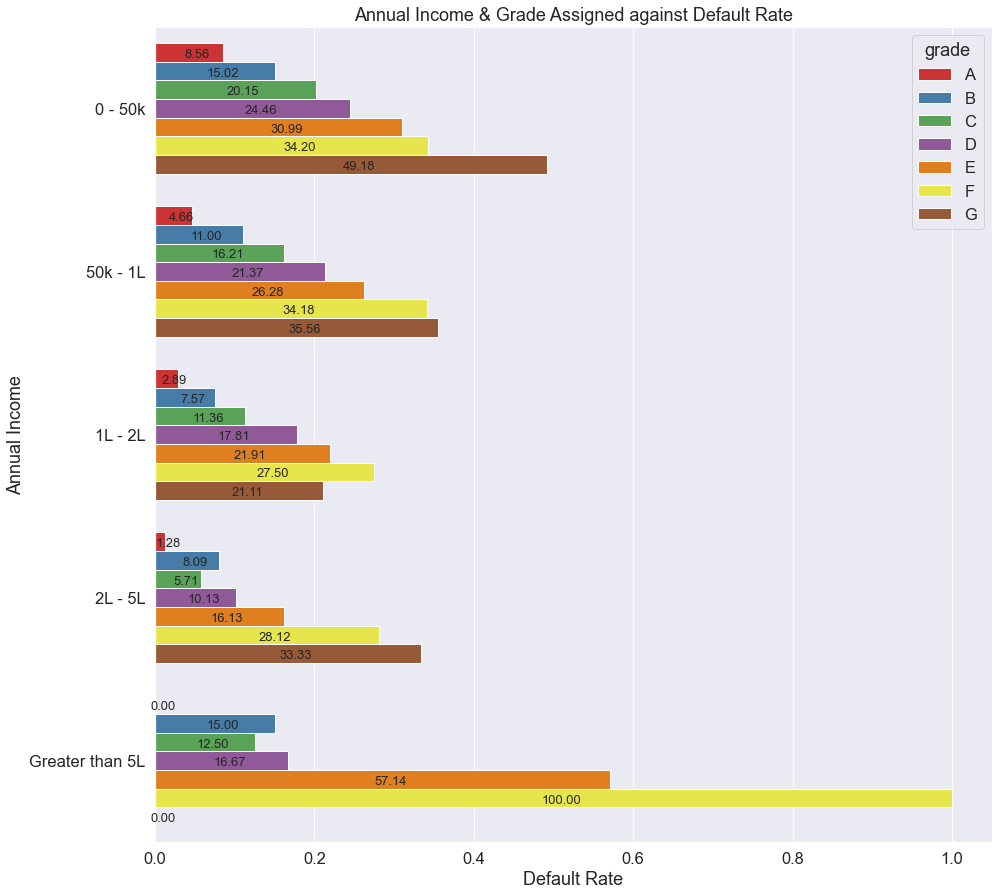

In [183]:
# Create a grouped bar chart with  annual_inc and verification_status on X-axis, default rate on Y-axis 
# Each bar in the bar group represents the term. 

# setting the font scale
sns.set(font_scale=1.5)

#setting the figure size
plt.figure(figsize=(15,15))

plot=sns.barplot(
   data=loans,
   x='defaulted', y="salary_group", hue="grade", hue_order=['A','B','C','D','E','F','G'],
    palette="Set1", ci=None 
)


plot.set_title('Annual Income & Grade Assigned against Default Rate')

plot.set(xlabel='Default Rate', ylabel='Annual Income')

#annotating the bars
for bar in plot.patches: 
    plot.annotate(format(bar.get_width()*100, '.2f'),  
                   (bar.get_x() + bar.get_width() / 2+0.01,  
                    bar.get_y()+0.12), ha='center', va='center', 
                   size=13, xytext=(0, 8), 
                   textcoords='offset points')

### Observations:

* As the **Grade** of the **Loan application** moves from A-G, higher will be the interest rates, and hence the **Default Rate** is also high.

* For a given grade, the **Default Rate decreases** as the **Annual income increases**.

# <font style="color:##002244">Conclusion :</font>

## <font style="color:###008080">Top 5 Predictors to look out for Accepting/Rejecting a Loan Application</font> 

### 1. Sub-Grade 

### 2. Interest Rate

### 3. Purpose

### 4. Term

### 5. Annual Income